In [1]:
import time

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

2023-03-29 16:14:56.132381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
t0 = time.time()

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2023-03-29 16:14:59.265572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2581 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0689 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0379 - accuracy: 0.9883


In [16]:
test_digits = test_images[0:10]

In [17]:
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 77ms/step


In [18]:
predictions[0]

array([3.2650873e-09, 3.6872571e-11, 4.3084484e-07, 3.4884994e-05,
       8.0172398e-13, 1.6138010e-08, 3.7385368e-14, 9.9996436e-01,
       1.7230497e-09, 2.8775659e-07], dtype=float32)

In [19]:
predictions[0].argmax()

7

In [20]:
predictions[0][7]

0.99996436

In [21]:
test_labels[0]

7

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0728 - accuracy: 0.9784


In [23]:
print(f"test_acc: {test_acc}")

test_acc: 0.9783999919891357


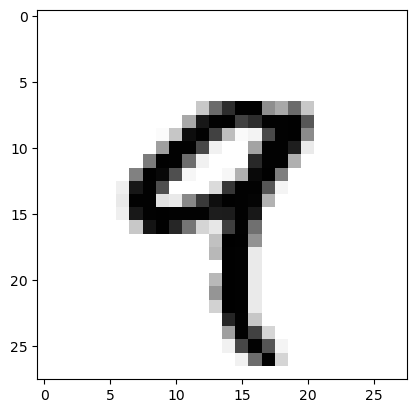

In [24]:
digit = train_images[4]
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [25]:
t1 = time.time()
print("Program Runtime: ", t1-t0, "seconds")

Program Runtime:  15.387492179870605 seconds


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
